In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [4]:
data = pd.read_csv('data.csv')

In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
data

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


# Feature Engineering

In [8]:
data['Nationality'].unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

In [9]:
data.drop('Nationality', axis=1, inplace=True)

In [9]:
def wage(val):
    try:
        act = float(val[1:-1])
        end = val[-1:]
        
        if end.lower() == 'k':
            act = act*1000
        elif end.lower() == 'm':
            act = act*10000000
    except ValueError:
        act = 0
    return act

In [10]:
data['Value'] = data['Value'].apply(wage)
data['Wage'] = data['Wage'].apply(wage)

# Exploratory Analysis

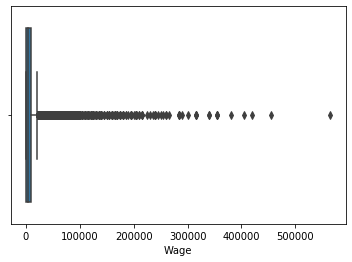

In [14]:
sb.boxplot(data['Wage'])

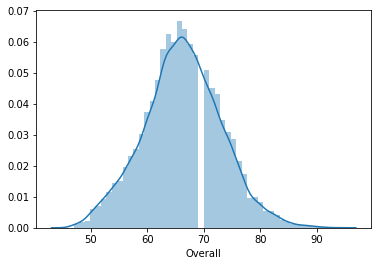

In [28]:
sb.distplot(data['Overall'])

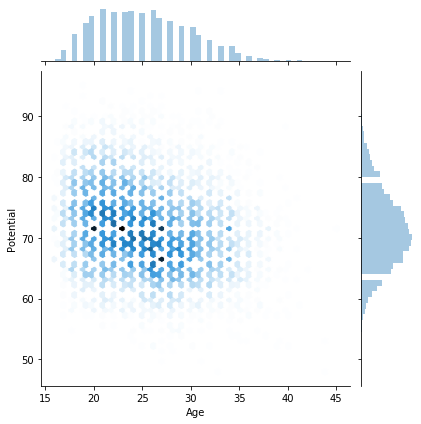

In [13]:
sb.jointplot(data['Age'], data['Potential'], kind='hex')

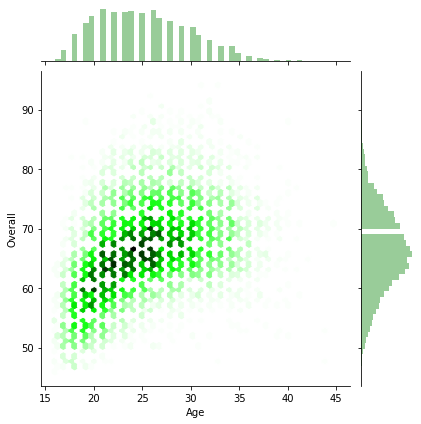

In [14]:
sb.jointplot(data['Age'], data['Overall'], kind='hex', color='green')

In [15]:
count_age = data.sort_values(by = 'Potential', ascending=False).head(15)[['Name','Potential', 'Age']]
count_age

,Name,Potential,Age
25,K. Mbappé,95,19
0,L. Messi,94,31
15,P. Dybala,94,24
1,Cristiano Ronaldo,94,33
2,Neymar Jr,93,26
3,De Gea,93,27
9,J. Oblak,93,25
229,G. Donnarumma,93,19
1143,Vinícius Júnior,92,17
155,O. Dembélé,92,21


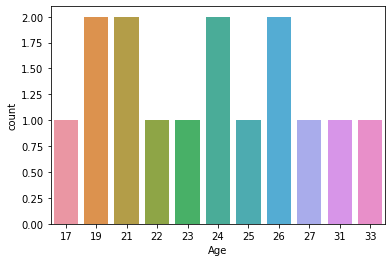

In [16]:
sb.countplot(count_age['Age'])

In [17]:
count_age_overall = data.sort_values(by = 'Overall', ascending=False).head(15)[['Name','Potential', 'Age']]
count_age_overall

,Name,Potential,Age
0,L. Messi,94,31
1,Cristiano Ronaldo,94,33
2,Neymar Jr,93,26
3,De Gea,93,27
4,K. De Bruyne,92,27
5,E. Hazard,91,27
6,L. Modrić,91,32
7,L. Suárez,91,31
8,Sergio Ramos,91,32
12,D. Godín,90,32


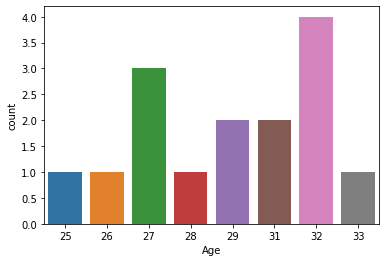

In [18]:
sb.countplot(count_age_overall['Age'])

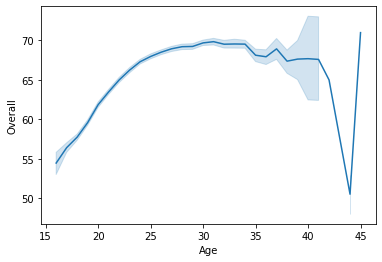

In [19]:
sb.lineplot(x=data['Age'], y=data['Overall'])

Payment based on age (umaar ke hisaab se paisa le)

In [20]:
def age_class(x):
    if x<20:
        x = 'Under 20'
    elif x>=20 and x<25:
        x = '21 to 25'
    elif x>=25 and x<30:
        x = '25 to 30'
    elif x>=30 and x<35:
        x = '30 to 30'
    elif x>=35:
        x = 'Over 35'
    return x

age_class = data['Age'].apply(age_class)

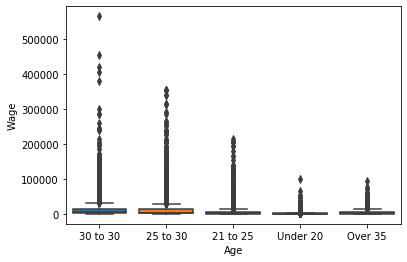

In [21]:
sb.boxplot(age_class, 'Wage', data = data)

hypothesis failed

In [22]:
position_remap = {'LWB':'side_def',
                  'LB':'side_def',
                  'RB':'side_def',
                  'RWB':'side_def',

                  'LCB':'cent_def',
                  'CB':'cent_def',
                  'RCB':'cent_def',
                  
                  'LDM':'cent_mid',
                  'CDM':'cent_mid',
                  'RDM':'cent_mid',

                  'LCM':'cent_mid',
                  'CM':'cent_mid',
                  'RCM':'cent_mid',
                  'CAM':'cent_mid',

                  'LW':'side_mid',
                  'LM':'side_mid',
                  'RM':'side_mid',
                  'RW':'side_mid',
                  'LAM':'side_mid',
                  'RAM':'side_mid',

                  'LF':'side_fwd',
                  'LS':'side_fwd', 
                  'RS':'side_fwd',
                  'RF':'side_fwd',
                'CF':'cent_fwd',
                  'ST':'cent_fwd'}  

In [23]:
position_group = data['Position'].map(position_remap)

In [24]:
position_group.dropna(axis=0)

0        side_fwd
1        cent_fwd
2        side_mid
4        cent_mid
5        side_fwd
           ...   
18202    cent_mid
18203    cent_fwd
18204    cent_fwd
18205    side_mid
18206    cent_mid
Name: Position, Length: 16122, dtype: object

In [25]:
remap_remap = {'side_mid':'mid',
              'side_fwd':'fwd',
              'side_def':'def',
              'cent_def':'def',
              'cent_mid':'mid',
              'cent_fwd':'fwd'}

In [26]:
position_group_remap = position_group.map(remap_remap)

In [27]:
position_group_remap.dropna(axis=0)

0        fwd
1        fwd
2        mid
4        mid
5        fwd
        ... 
18202    mid
18203    fwd
18204    fwd
18205    mid
18206    mid
Name: Position, Length: 16122, dtype: object

In [28]:
data_clone = data

In [29]:
data_clone['Position'] = data_clone['Position'].map(position_remap)

In [30]:
data_clone['Position'] = data_clone['Position'].map(remap_remap)

In [31]:
x = data_clone.groupby('Position').mean()

In [32]:
x

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Position,,,,,,,,,,,,,,,,,,,,,
def,213916.696727,25.474088,66.400102,71.011251,1.722850e+07,9146.096147,1610.701330,1.099557,2.823048,2.211899,...,43.470167,58.414081,63.927890,66.727583,65.031879,10.545857,10.561712,10.524378,10.545687,10.524719
fwd,214695.716910,24.980127,66.291714,71.445819,2.593103e+07,11148.856393,1624.389951,1.140982,3.103487,2.607049,...,63.121860,60.806149,29.810649,25.960630,23.383202,10.429321,10.574803,10.590551,10.486689,10.489314
mid,216122.721834,24.651733,66.568059,71.930030,2.605417e+07,10532.876532,1726.151930,1.118856,3.110159,2.754118,...,54.962973,61.686915,49.118856,49.591382,46.958888,10.487416,10.545922,10.555804,10.531427,10.502570


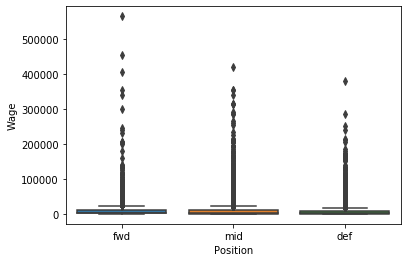

In [33]:
sb.boxplot(data['Position'],data['Wage'] )

In [34]:
comparing_aspects = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

for i in comparing_aspects:
    print('{0}: {1}'.format(i, data.loc[data[i].idxmax()][1]))

Crossing: K. De Bruyne
Finishing: L. Messi
HeadingAccuracy: Naldo
ShortPassing: L. Modrić
Volleys: E. Cavani
Dribbling: L. Messi
Curve: Quaresma
FKAccuracy: L. Messi
LongPassing: T. Kroos
BallControl: L. Messi
Acceleration: Douglas Costa
SprintSpeed: K. Mbappé
Agility: Neymar Jr
Reactions: Cristiano Ronaldo
Balance: Bernard
ShotPower: Cristiano Ronaldo
Jumping: Cristiano Ronaldo
Stamina: N. Kanté
Strength: A. Akinfenwa
LongShots: L. Messi
Aggression: B. Pearson
Interceptions: N. Kanté
Positioning: Cristiano Ronaldo
Vision: L. Messi
Penalties: M. Balotelli
Composure: L. Messi
Marking: A. Barzagli
StandingTackle: G. Chiellini
SlidingTackle: Sergio Ramos
GKDiving: De Gea
GKHandling: J. Oblak
GKKicking: M. Neuer
GKPositioning: G. Buffon
GKReflexes: De Gea


In [35]:
heat = data.groupby(position_group).mean()

In [36]:
heat = heat[comparing_aspects]

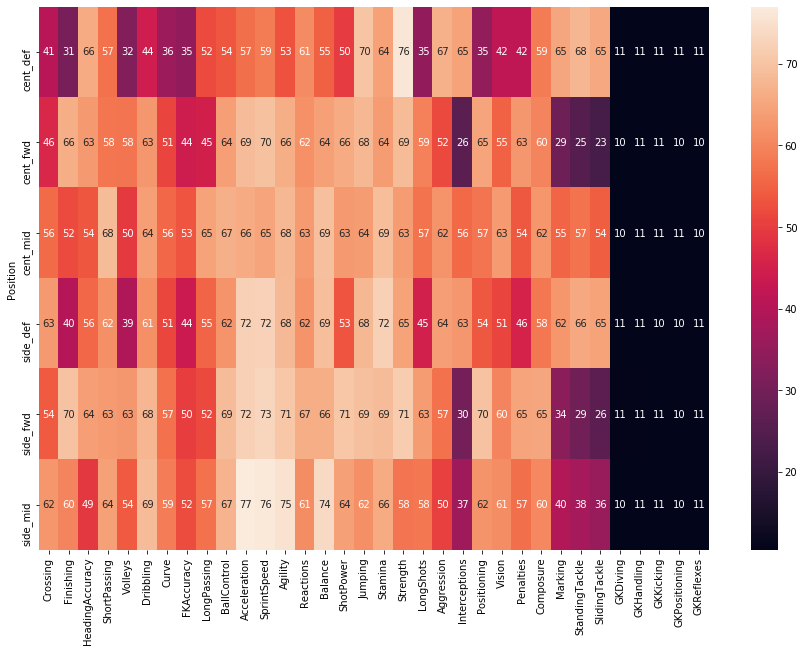

In [37]:
plt.figure(figsize=(15,10))
sb.heatmap(heat, annot=True)

In [38]:
pot = data.sort_values(by='Potential')

In [39]:
diff = pd.DataFrame(data= [pot['Potential']-pot['Overall'], pot['Name'], pot['Potential'], pot['Overall']], index=['diff', 'name', 'potential', 'overall']).T

In [40]:
diff = diff.sort_values(by = 'diff', ascending=False).head(15)

Text(0.5, 1.0, '15 players with the highest remaining potential left to grow')

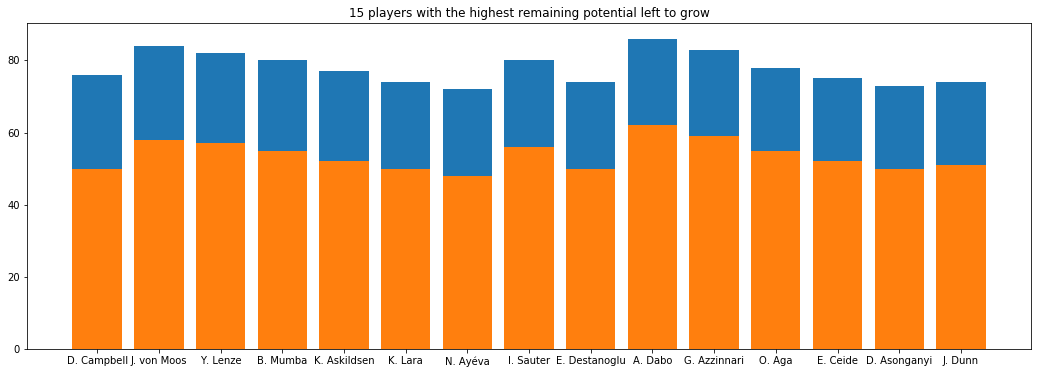

In [41]:
plt.figure(figsize=(18,6))
plt.bar(diff['name'], diff['potential'])
plt.bar(diff['name'], diff['overall'])
plt.title('15 players with the highest remaining potential left to grow')

In [42]:
x = data.groupby('Age').mean()['Potential']

In [43]:
x

Age
16    73.190476
17    74.339100
18    73.530055
19    73.146484
20    73.213710
21    72.957836
22    72.819403
23    72.555556
24    72.079529
25    71.290371
26    70.176640
27    69.709122
28    69.444142
29    69.357664
30    69.700109
31    69.850071
32    69.529617
33    69.558824
34    69.539604
35    68.132653
36    67.937008
37    68.939024
38    67.378378
39    67.640000
40    67.692308
41    67.600000
42    65.000000
44    50.500000
45    71.000000
Name: Potential, dtype: float64

Text(0, 0.5, 'Rating')

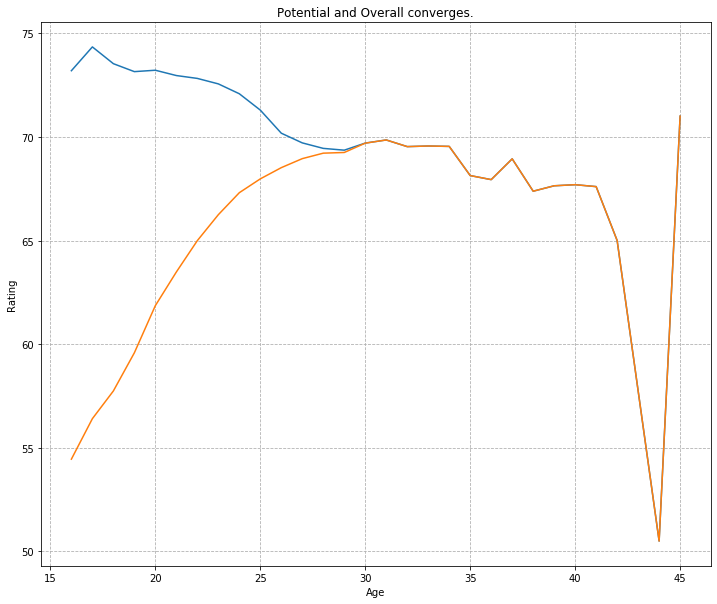

In [44]:
plt.figure(figsize=(12,10))
plt.plot(data.groupby('Age').mean()['Potential'])
plt.plot(data.groupby('Age').mean()['Overall'])
plt.title("Potential and Overall converges.")
plt.grid(linestyle='--')
plt.xlabel('Age')
plt.ylabel('Rating')

The potential meets overall somewhere near at 29 years old.

Preferred Foot

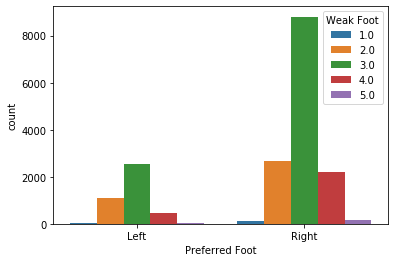

In [45]:
sb.countplot(data['Preferred Foot'],hue=data['Weak Foot'] )

Distribution of Wage

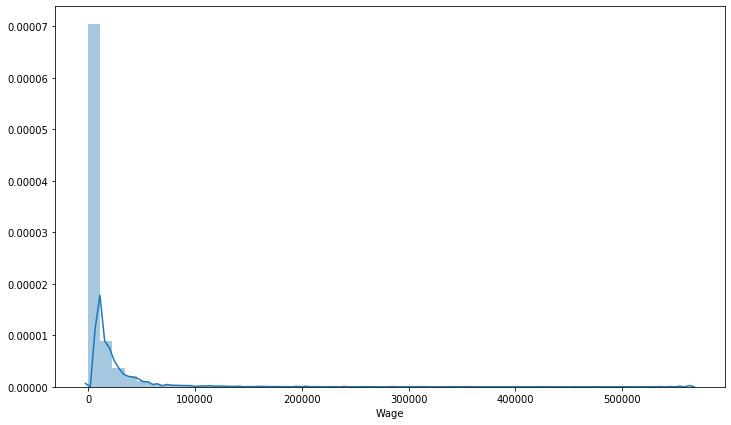

In [46]:
plt.figure(figsize=(12,7))
sb.distplot(data['Wage'])

In [47]:
s = data[data['Position']=='def']

In [48]:
s['Position']

8        def
12       def
24       def
34       def
35       def
        ... 
18181    def
18187    def
18191    def
18193    def
18201    def
Name: Position, Length: 5866, dtype: object

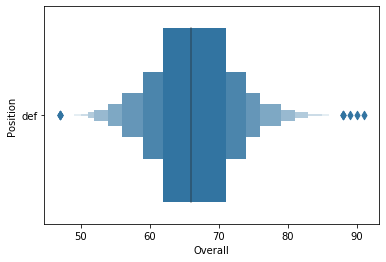

In [49]:
sb.boxenplot(data[data['Position']=='def']['Overall'], data[data['Position']=='def']['Position'])

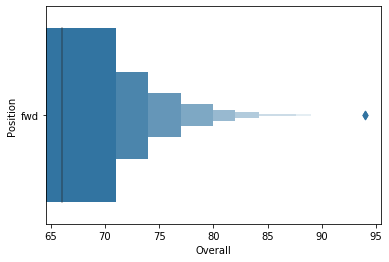

In [50]:
sb.boxenplot(data[data['Position']=='fwd']['Overall'], data[data['Position']=='fwd']['Position'])

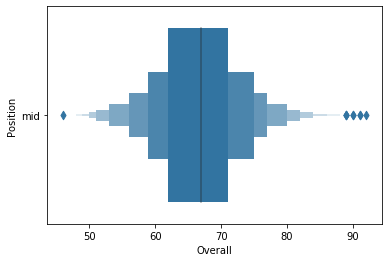

In [51]:
sb.boxenplot(data[data['Position']=='mid']['Overall'], data[data['Position']=='mid']['Position'])

In [52]:
aspects = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']

pairs = data[aspects]

In [53]:
pairs

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,...,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0
18203,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,...,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0
18204,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,...,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0
18205,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,...,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0


In [54]:
sb.pairplot(pairs)

Error in callback <function flush_figures at 0x00000175DDDDC288> (for post_execute):


KeyboardInterrupt: 

C:\Users\mohsh\anaconda3\lib\site-packages\seaborn\categorical.py:2784: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


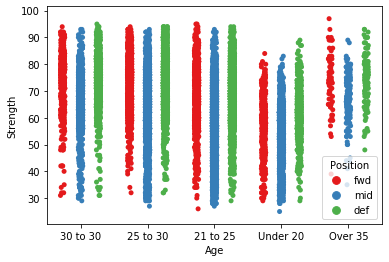

In [55]:
sb.stripplot(x=age_class, y="Strength", data=data,hue='Position',jitter=True,palette='Set1',split=True)

In [56]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

4.7.1


# Modeling

In [16]:
model_data = data.copy()

In [17]:
clutter = ['ID','Photo','Flag','Club Logo','Jersey Number','Joined','Special','Loaned From','Body Type', 'Release Clause',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club']
model_data.drop(clutter, axis=1, inplace=True)

In [18]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 71 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18207 non-null  int64  
 1   Nationality               18207 non-null  object 
 2   Overall                   18207 non-null  int64  
 3   Potential                 18207 non-null  int64  
 4   Preferred Foot            18159 non-null  object 
 5   International Reputation  18159 non-null  float64
 6   Weak Foot                 18159 non-null  float64
 7   Skill Moves               18159 non-null  float64
 8   Work Rate                 18159 non-null  object 
 9   Real Face                 18159 non-null  object 
 10  Position                  18147 non-null  object 
 11  LS                        16122 non-null  object 
 12  ST                        16122 non-null  object 
 13  RS                        16122 non-null  object 
 14  LW    

In [19]:
model_data.drop(model_data.iloc[:, 10:36], axis=1, inplace=True)

In [20]:
#Split the Work Rate Column in two
tempwork = model_data["Work Rate"].str.split("/ ", n = 1, expand = True) 
#Create new column for first work rate
model_data["WorkRate1"]= tempwork[0]   
#Create new column for second work rate
model_data["WorkRate2"]= tempwork[1]

model_data.drop('Work Rate', axis=1, inplace = True)

In [21]:
model_data = pd.get_dummies(model_data)

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [23]:
model_data.dropna(inplace=True)

In [24]:
model_data.isna().sum()

Age                         0
Overall                     0
Potential                   0
International Reputation    0
Weak Foot                   0
                           ..
WorkRate1_Low               0
WorkRate1_Medium            0
WorkRate2_High              0
WorkRate2_Low               0
WorkRate2_Medium            0
Length: 312, dtype: int64

In [27]:
(print_fullmodel_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18159 entries, 0 to 18206
Columns: 312 entries, Age to WorkRate2_Medium
dtypes: float64(37), int64(3), uint8(272)
memory usage: 10.4 MB


TypeError: object of type 'NoneType' has no len()

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, auc

In [235]:
X = model_data.drop('Overall', axis=1)
y = model_data.Overall

In [236]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [237]:
model1 = LinearRegression()
model2 = SVR()
models = [model1, model2]

In [245]:
for model in models:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print("For model {} r2 score is {}\n".format(model1, r2_score(y_test, preds)))
    print("For model {} mean score is {}\n".format(model2, mean_absolute_error(y_test, preds)))

For model LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) r2 score is 0.9269542186139186

For model SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) mean score is 1.453880611677948

For model LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) r2 score is 0.9738904310549662

For model SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) mean score is 0.8399291204087315



In [277]:
names = model_data.columns

In [278]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X, y)
print ("Features sorted by their score: ")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))

Features sorted by their score:
[(0.0361, 'FKAccuracy'), (0.0355, 'Interceptions'), (0.0259, 'ShotPower'), (0.0213, 'GKKicking'), (0.0195, 'GKHandling'), (0.0183, 'WorkRate1_High'), (0.0178, 'WorkRate2_Low'), (0.0176, 'WorkRate1_Low'), (0.0142, 'WorkRate1_Medium'), (0.0142, 'Reactions'), (0.0139, 'Balance'), (0.0127, 'Potential'), (0.0126, 'Preferred Foot_Left'), (0.0117, 'Real Face_Yes'), (0.0117, 'Position_def'), (0.0116, 'SlidingTackle'), (0.0114, 'LongPassing'), (0.0102, 'Jumping'), (0.0101, 'Curve'), (0.01, 'Finishing'), (0.0092, 'Overall'), (0.0091, 'GKDiving'), (0.009, 'BallControl'), (0.0089, 'Penalties'), (0.0077, 'ShortPassing'), (0.0071, 'Weak Foot'), (0.0071, 'Skill Moves'), (0.0071, 'Aggression'), (0.0067, 'Preferred Foot_Right'), (0.0067, 'GKPositioning'), (0.0063, 'StandingTackle'), (0.0056, 'Composure'), (0.0052, 'Marking'), (0.0049, 'Real Face_No'), (0.0048, 'SprintSpeed'), (0.0045, 'Vision'), (0.0044, 'Position_fwd'), (0.0041, 'WorkRate2_Medium'), (0.0039, 'Accelerati

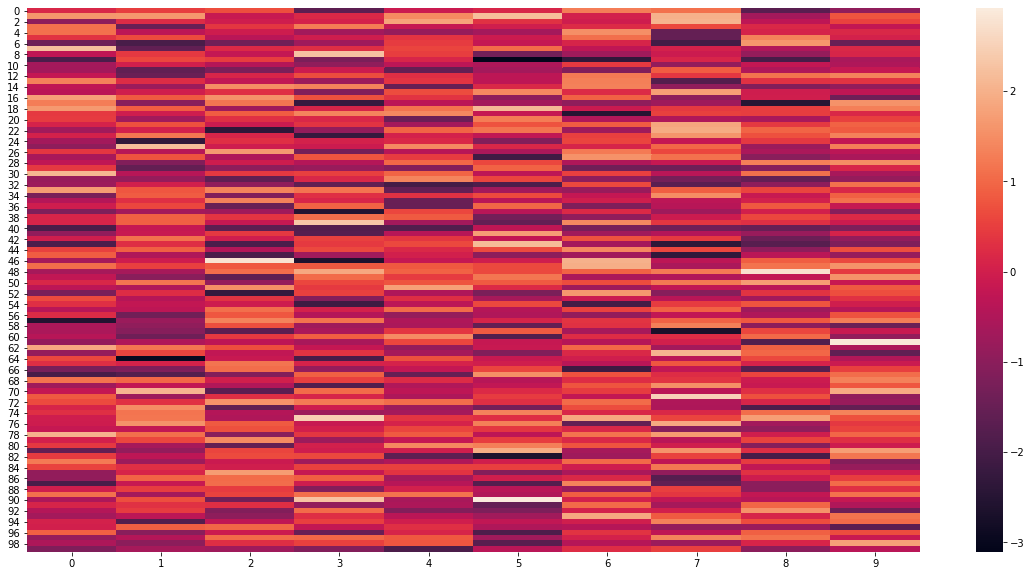

In [263]:
plt.figure(figsize=(20,10))
sb.heatmap(X_selected)

In [ ]:
sb.lmplot